[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab3-GenAI-LLM/notebooks/01-introduksjon-genai.ipynb)

# Introduksjon til Generativ AI

**ELMED219 / BMED365 - Lab 3**

---

## Læringsmål

Etter denne notebooken skal du kunne:
- Forklare hva generativ AI er og hvordan det skiller seg fra tradisjonell AI
- Beskrive den historiske utviklingen frem til dagens LLM-er
- Identifisere relevante anvendelser av generativ AI i medisin og helsevesen
- Forstå grunnleggende begreper som brukes i feltet

## Innhold

1. [Hva er Generativ AI?](#1-hva-er-generativ-ai)
2. [Historisk utvikling](#2-historisk-utvikling)
3. [Store språkmodeller (LLM)](#3-store-språkmodeller-llm)
4. [Anvendelser i medisin](#4-anvendelser-i-medisin)
5. [Begrensninger og utfordringer](#5-begrensninger-og-utfordringer)
6. [Oppsummering](#6-oppsummering)

---

## 1. Hva er Generativ AI?

**Generativ AI** (GenAI) refererer til kunstig intelligens-systemer som kan *skape nytt innhold* - enten det er tekst, bilder, lyd, video eller kode.

### Diskriminativ vs. Generativ AI

| Type | Hva den gjør | Eksempel |
|------|--------------|----------|
| **Diskriminativ AI** | Klassifiserer eller predikerer basert på input | "Er dette røntgenbilde normalt eller patologisk?" |
| **Generativ AI** | Skaper nytt innhold basert på mønstre i treningsdata | "Skriv et journalnotat basert på denne konsultasjonen" |

### Nøkkelegenskaper ved generativ AI

1. **Kreativitet**: Kan produsere originalt innhold som ikke finnes i treningsdataene
2. **Fleksibilitet**: Samme modell kan løse mange ulike oppgaver
3. **Naturlig språk**: Kommuniserer på menneskelig språk (norsk, engelsk, etc.)
4. **Kontekstuell forståelse**: Tar hensyn til sammenheng og tidligere informasjon

### Refleksjon

> **Tenk over**: Hvilke oppgaver i din hverdag (som student eller fremtidig helsearbeider) involverer å *skape* innhold vs. å *klassifisere/vurdere* eksisterende informasjon?

---

## 2. Historisk utvikling

Generativ AI har en lang historie, men de siste årene har det skjedd en revolusjon:

### Tidslinje

```
1950-tallet  | Alan Turing: "Kan maskiner tenke?"
     |
1960-tallet  | ELIZA: Enkel chatbot (mønstermatching)
     |
1990-tallet  | Statistiske språkmodeller, n-gram
     |
2013         | Word2Vec: Ord som vektorer (embeddings)
     |
2017         | "Attention Is All You Need" - Transformer-arkitekturen
     |
2018         | BERT (Google) - Bidirectional Transformers
     |
2020         | GPT-3 (OpenAI) - 175 milliarder parametere
     |
2022         | ChatGPT lanseres - AI for alle
     |
2023         | GPT-4, Claude 2, Gemini - Multimodale modeller
     |
2024-2025    | GPT-4o, Claude 3.5, DeepSeek-R1, open-source boom
```

### Hva endret seg i 2017?

Artikkelen ["Attention Is All You Need"](https://arxiv.org/abs/1706.03762) introduserte **transformer-arkitekturen**, som løste to kritiske problemer:

1. **Parallellisering**: I motsetning til tidligere modeller (RNN/LSTM) kan transformers trene på hele sekvenser samtidig
2. **Langtidsavhengigheter**: Attention-mekanismen lar modellen "se" hele konteksten, ikke bare nylig informasjon

Dette muliggjorde trening av mye større modeller på mye mer data.

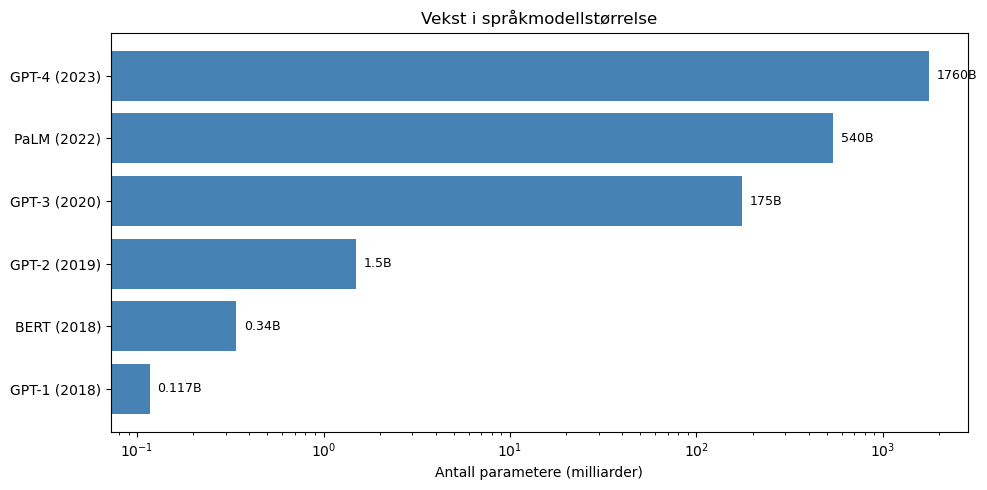

In [1]:
# Visualisering av veksten i modellstørrelse
import matplotlib.pyplot as plt
import numpy as np

# Data: Modellstørrelse (antall parametere) over tid
modeller = {
    'GPT-1 (2018)': 0.117,
    'BERT (2018)': 0.34,
    'GPT-2 (2019)': 1.5,
    'GPT-3 (2020)': 175,
    'PaLM (2022)': 540,
    'GPT-4 (2023)': 1760,  # Estimat
}

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(list(modeller.keys()), list(modeller.values()), color='steelblue')
ax.set_xlabel('Antall parametere (milliarder)')
ax.set_title('Vekst i språkmodellstørrelse')
ax.set_xscale('log')

# Legg til verdier på søylene
for i, (modell, verdi) in enumerate(modeller.items()):
    ax.text(verdi * 1.1, i, f'{verdi}B', va='center', fontsize=9)

plt.tight_layout()
plt.show()

---

## 3. Store språkmodeller (LLM)

**Large Language Models (LLM)** er nevrale nettverk med milliarder av parametere, trent på enorme mengder tekst fra internett, bøker og andre kilder.

### Hvordan fungerer de?

I kjernen gjør LLM-er én ting: **predikerer neste ord** (eller *token*).

```
Input:  "Pasienten har feber og"
Output: "hoste" (mest sannsynlig neste ord)
```

Ved å gjenta denne prosessen tusenvis av ganger, kan modellen generere sammenhengende tekst.

### Viktige konsepter

| Begrep | Forklaring |
|--------|------------|
| **Token** | Minste enhet modellen arbeider med (ofte ord eller orddeler) |
| **Kontekstvindu** | Hvor mye tekst modellen kan "huske" samtidig |
| **Temperature** | Kontrollerer kreativitet vs. forutsigbarhet |
| **Prompt** | Instruksjonen/spørsmålet du gir modellen |
| **Hallusinering** | Når modellen "finner på" fakta som ikke stemmer |

### Dagens ledende modeller

| Modell | Utvikler | Styrker | Tilgang |
|--------|----------|---------|----------|
| **GPT-4o** | OpenAI | Multimodal, rask | ChatGPT, API |
| **Claude 3.5** | Anthropic | Lang kontekst, sikkerhet | claude.ai, API |
| **Gemini** | Google | Integrert med Google-tjenester | gemini.google.com |
| **Llama 3** | Meta | Open source | Lokal kjøring |
| **DeepSeek-R1** | DeepSeek | Reasoning, open source | Lokal kjøring |

---

## 4. Anvendelser i medisin

Generativ AI har potensial til å transformere mange aspekter av helsevesenet:

### Klinisk dokumentasjon
- **Automatisk journalføring**: Transkribere og strukturere konsultasjoner
- **Epikrisegenerering**: Lage sammendrag av sykehusopphold
- **Koding**: Foreslå diagnosekoder (ICD-10) basert på journaltekst

### Klinisk beslutningsstøtte
- **Differensialdiagnose**: Foreslå mulige diagnoser basert på symptomer
- **Medisininteraksjoner**: Sjekke potensielle legemiddelinteraksjoner
- **Oppsummering**: Sammenfatte lange pasientjournaler

### Pasientkommunikasjon
- **Pasientinformasjon**: Forklare diagnoser på pasientvennlig språk
- **Triagering**: Vurdere hastegrad basert på symptombeskrivelser
- **Oppfølging**: Automatisere rutinekommunikasjon

### Forskning og utdanning
- **Litteratursøk**: Oppsummere forskningsartikler
- **Hypotesegenerering**: Foreslå forskningsspørsmål
- **Simulerte pasienter**: Øvingsverktøy for studenter

### Eksempel: Journalsammendrag

**Input (lang journaltekst):**
```
15.03.2024: Pasienten kommer for kontroll av diabetes type 2. 
HbA1c 7.8%, opp fra 7.2% sist. Har sluttet med daglige turer 
pga knesmerter. Vekt opp 3 kg siste 3 mnd. Metformin 1000mg x2 
fortsetter. Henviser fysioterapi for kne. Ernæringsveiledning tilbudt.

22.03.2024: Telefon - spør om nye tabletter for diabetes. 
Informert om å vente til neste kontroll. Fornøyd med fysioterapi.

29.03.2024: Akutt time - urinveisinfeksjon. Dysuri og frekvens. 
U-stix: Leukocytter+++, nitritt+. Selexid 200mg x3 i 5 dager. 
Kontroll-urin om 1 uke.
```

**AI-generert sammendrag:**
```
Diabetes type 2-pasient med forverret glykemisk kontroll (HbA1c 7.8%) 
relatert til redusert fysisk aktivitet pga knesmerter. Vektøkning 3 kg. 
Henvist fysioterapi og tilbudt ernæringsveiledning. Behandlet for UVI 
i mellomtiden. Metformin fortsetter uendret.
```

---

## 5. Begrensninger og utfordringer

Til tross for imponerende evner, har generativ AI betydelige begrensninger:

### Hallusinering
LLM-er kan generere tekst som *høres* riktig ut, men som er faktisk feil. Dette er spesielt farlig i medisinsk kontekst.

**Eksempel:**
```
Spørsmål: "Hva er standard dose for Paracetamol til barn?"
AI-svar: "Standard dose er 25 mg/kg hver 4. time, maksimalt 100 mg/kg/dag."
                      ^
        FEIL! Korrekt maksimaldose er 60-75 mg/kg/dag
```

### Manglende oppdatert kunnskap
Modeller har en "kunnskapscutoff" - de kjenner ikke til hendelser etter treningsdataene ble samlet.

### Bias og representasjon
Treningsdata reflekterer historiske skjevheter som kan påvirke råd om behandling, diagnoser m.m.

### Personvern
- Data sendt til sky-tjenester kan lagres og brukes til trening
- GDPR og helselovgivning setter strenge krav til pasientdata

### Ansvar
Hvem er ansvarlig hvis AI gir feil medisinsk råd? Legen? Sykehuset? AI-leverandøren?

### Viktige påminnelser

> **AI erstatter IKKE klinisk vurdering.** Alle AI-genererte forslag må valideres av kvalifisert helsepersonell.

> **Personvern først.** Aldri del reelle pasientdata med AI-tjenester uten godkjent databehandleravtale.

> **Vær kritisk.** AI kan "hallusinere" - verifiser alltid fakta mot pålitelige kilder.

---

## 6. Oppsummering

### Hovedpunkter

1. **Generativ AI skaper nytt innhold** - tekst, bilder, kode - basert på mønstre i treningsdata

2. **Transformer-arkitekturen (2017)** muliggjorde dagens store språkmodeller gjennom effektiv parallellisering og attention-mekanismen

3. **LLM-er predikerer neste token** - dette enkle prinsippet gir oppsiktsvekkende resultater når modellen er stor nok

4. **Medisinske anvendelser** inkluderer dokumentasjon, beslutningsstøtte, pasientkommunikasjon og forskning

5. **Begrensninger** som hallusinering, bias og personvern krever kritisk og ansvarlig bruk

### Neste steg

I de neste notebooks går vi dypere inn i:
- [02: Transformer-arkitekturen](02-transformer-arkitektur.ipynb) - Hvordan attention fungerer
- [03: LLM Grunnleggende](03-llm-grunnleggende.ipynb) - Tokens, temperature og kontekst
- [04: Prompt Engineering](04-prompt-engineering.ipynb) - Teknikker for effektiv bruk

---

## Refleksjonsoppgaver

1. **Muligheter**: Nevn tre konkrete oppgaver i helsevesenet der generativ AI kan spare tid eller forbedre kvalitet.

2. **Risiko**: Hva er den potensielt farligste konsekvensen av å stole blindt på AI i klinisk praksis?

3. **Fremtid**: Hvordan tror du forholdet mellom lege og AI vil utvikle seg de neste 10 årene?

---

*Neste notebook: [02 - Transformer-arkitekturen](02-transformer-arkitektur.ipynb)*